In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khildafn07","key":"ada864fa6d5443c01c20103abd14010d"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 48.7MB/s]


In [5]:
!mkdir stroke-prediction-dataset
!unzip stroke-prediction-dataset.zip -d stroke-prediction-dataset
!ls stroke-prediction-dataset

Archive:  stroke-prediction-dataset.zip
  inflating: stroke-prediction-dataset/healthcare-dataset-stroke-data.csv  
healthcare-dataset-stroke-data.csv


In [6]:
df = pd.read_csv('/content/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
df=df.drop(["id"],axis="columns")

In [9]:
le=preprocessing.LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])
df["work_type"]=le.fit_transform(df["work_type"])
df["smoking_status"]=le.fit_transform(df["smoking_status"])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [10]:
df = df.dropna(axis=0, subset=['bmi'])

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
feature = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi', 'smoking_status']
x = df[feature]
y = df['stroke']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 422.0 KB


In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.33333333],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.66666667],
       [0.        , 0.59716797, 0.        , ..., 0.53600776, 0.27605956,
        1.        ],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.66666667],
       [0.5       , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.33333333],
       [0.        , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        0.        ]])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3)

In [17]:
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [18]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1441 (5.63 KB)
Trainable params: 1441 (5.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

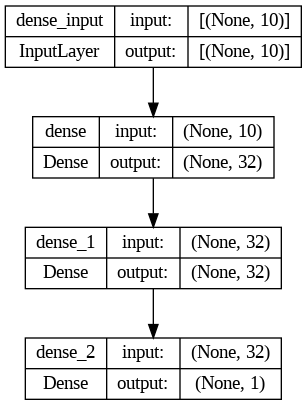

In [21]:
plot_model(model, show_shapes = True)

In [22]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 0.4302 - accuracy: 0.9302
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 0.9587
Epoch 3/100
108/108 [==============================] - 0s 4ms/step - loss: 0.2107 - accuracy: 0.9587
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9587
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9587
Epoch 6/100
108/108 [==============================] - 0s 4ms/step - loss: 0.1952 - accuracy: 0.9587
Epoch 7/100
108/108 [==============================] - 0s 3ms/step - loss: 0.1932 - accuracy: 0.9587
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9587
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1896 - accuracy: 0.9587
Epoch 10/100
108/108 [==============================] - 0s 2ms/step - loss: 0.1880 - accura

In [23]:
model.evaluate(x_test, y_test)

47/47 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9545


[0.1490907520055771, 0.9545146226882935]

In [24]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [25]:
if model.predict([[0, 53.0,	0,	0,	1,	3,	1,	63.78,	25.9,	2]]) == 0:
  print('0');
else :
  print('1');

1/1 [==============================] - 0s 110ms/step
1


In [26]:
model.save('stroke_prediction.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
model = tf.keras.models.load_model('stroke_prediction.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("stroke_prediction.tflite", "wb").write(tflite_model)

7824